# Olympic Analysis Web App 

**As we all know that we all are very excitement about the Olympics, I found myself thinking various questions about India's performance, the overall top-performing countries, and which athletes secured the most gold, silver, and bronze medals. With my interest in data science and analysis, I decided to create a web application to thoroughly analyze the Olympic dataset. To accomplish this, I searched for a suitable dataset on Kaggle and successfully built the web application. I will share the link to the application below as a demonstration.**

#### In Jupyter Notebook, I will perform some analysis and create codes and functions that will accurately reflect my analysis.

## About Dataset

This is a historical dataset on the modern Olympic Games, including all the Games from Athens 1896 to Rio 2016.

**Note**
* That the Winter and Summer Games were held in the same year up until 1992. After that, they staggered them such that Winter Games occur on a four year cycle starting with 1994, then Summer in 1996, then Winter in 1998, and so on

## Content

* The file athlete_events.csv contains 271116 rows and 15 columns

1. ID - Unique number for each athlete
2. Name - Athlete's name
3. Sex - M or F
4. Age - Integer
5. Height - In centimeters
6. Weight - In kilograms
7. Team - Team name
8. NOC - National Olympic Committee 3-letter code
9. Games - Year and season
10. Year - Integer
11. Season - Summer or Winter
12. City - Host city
13. Sport - Sport
14. Event - Event
15. Medal - Gold, Silver, Bronze or NA Bronze, or NA

### Import Libraries

In [245]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Import Dataset

In [317]:
df = pd.read_csv('athlete_events.csv',encoding='utf-8')
region_df = pd.read_csv('noc_regions.csv',encoding='utf-8')

In [247]:
df.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN
271115,135571,Tomasz Ireneusz ya,M,34.0,185.0,96.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,NaN


Starting from the first Summer Olympics in 1896, we're checking out how athletes did each year. We know stuff about the athletes, what games they played, and if they won a medal. We're only looking at the Summer Olympics to really understand how sports have changed over time. So, let's jump into the numbers, teams, and stories of each Olympic event!"

In [248]:
df.shape

(271116, 15)

In [249]:
df = df[df['Season'] == 'Summer']

In [250]:
df.shape

(222552, 15)

In [251]:
region_df.tail()

,NOC,region,notes
225,YEM,Yemen,NaN
226,YMD,Yemen,South Yemen
227,YUG,Serbia,Yugoslavia
228,ZAM,Zambia,NaN
229,ZIM,Zimbabwe,NaN


### Merge both data 

In [252]:
df = df.merge(region_df, on='NOC', how='left')

In [253]:
df.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
222547,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN,Argentina,NaN
222548,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN,USA,NaN
222549,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN
222550,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN
222551,135568,Olga Igorevna Zyuzkova,F,33.0,171.0,69.0,Belarus,BLR,2016 Summer,2016,Summer,Rio de Janeiro,Basketball,Basketball Women's Basketball,NaN,Belarus,NaN


In [254]:
df['NOC'].unique()

array(['CHN', 'DEN', 'NED', 'FIN', 'NOR', 'ROU', 'EST', 'FRA', 'MAR',
       'ESP', 'EGY', 'IRI', 'BUL', 'ITA', 'CHA', 'AZE', 'SUD', 'RUS',
       'ARG', 'CUB', 'BLR', 'GRE', 'CMR', 'TUR', 'CHI', 'MEX', 'USA',
       'URS', 'NCA', 'HUN', 'NGR', 'ALG', 'KUW', 'BRN', 'PAK', 'IRQ',
       'UAR', 'LIB', 'QAT', 'MAS', 'GER', 'CAN', 'IRL', 'AUS', 'RSA',
       'ERI', 'TAN', 'JOR', 'TUN', 'LBA', 'BEL', 'DJI', 'PLE', 'COM',
       'KAZ', 'BRU', 'IND', 'KSA', 'SYR', 'MDV', 'ETH', 'UAE', 'YAR',
       'INA', 'PHI', 'SGP', 'UZB', 'KGZ', 'TJK', 'EUN', 'JPN', 'CGO',
       'SUI', 'BRA', 'GDR', 'MON', 'ISR', 'URU', 'SWE', 'SRI', 'ARM',
       'CIV', 'KEN', 'BEN', 'GBR', 'GHA', 'SOM', 'NIG', 'MLI', 'AFG',
       'POL', 'CRC', 'PAN', 'GEO', 'SLO', 'GUY', 'NZL', 'POR', 'PAR',
       'ANG', 'VEN', 'COL', 'FRG', 'BAN', 'PER', 'ESA', 'PUR', 'UGA',
       'HON', 'ECU', 'TKM', 'MRI', 'SEY', 'TCH', 'LUX', 'MTN', 'SKN',
       'TTO', 'DOM', 'VIN', 'JAM', 'LBR', 'SUR', 'NEP', 'MGL', 'AUT',
       'PLW', 'LTU',

challange : To understand NOC need geographical knowledge like BLR (Belarus)

### The Number of countries perform in the  olympics?

In [255]:
df['region'].unique().shape

(206,)

challenge : The dataset presents historical complexities, including reunification cases like East and West Germany, border issues, and diplomatic challenges. Noteworthy is Russia's Olympic ban due to doping violations, leading to its athletes competing under the ROC flag. These intricacies, coupled with data anomalies like dual occurrences for Russia

### Treating Missing Values

In [256]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9189
Height     51857
Weight     53854
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188464
region       370
notes     218151
dtype: int64

* So we can see ID , name , sex , team , NOC, games , year , season, city, sport, event, have no missing value
* Age have missing values of athletes ,  height and weight almost 1/5 of athelets are missing .
* region also have missing values and sometimes it happen sometimes region fails to converge with NOC.

**Reason : It is because there are some NOC which is not related to any region(countries)**

### Treating duplicates rows

In [257]:
df.duplicated().sum()

1385

In [258]:
# Lets remove it 
df.drop_duplicates(inplace=True)

In [259]:
df.shape

(221167, 17)

### Enhancing Medal Data: One-Hot Encoding for Gold, Silver, and Bronze Categories

In [260]:
df['Medal'].value_counts()

Medal
Gold      11456
Bronze    11409
Silver    11212
Name: count, dtype: int64

In [261]:
df_dummy = pd.get_dummies(df['Medal'],dtype=int)
df_dummy

,Bronze,Gold,Silver
0,0,0,0
1,0,0,0
2,0,0,0
3,0,1,0
4,0,0,0
...,...,...,...
222547,0,0,0
222548,0,0,0
222549,0,0,0
222550,0,0,0


In [262]:
# concatinating with original data 
df = pd.concat([df,df_dummy],axis=1)
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0


In [263]:
df.shape

(221167, 20)

### The numbers of medal count based on regions, Top regions with the highest number of medals recorded in the Summer Olympics?

* Aggregating Olympic Data by National Olympic Committee (NOC): Total Medals Count

In [264]:
df.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()

,NOC,Gold,Silver,Bronze
0,USA,2472,1333,1197
1,URS,832,635,596
2,GBR,635,729,620
3,GER,592,538,649
4,ITA,518,474,454
...,...,...,...,...
225,AHO,0,1,0
226,LBR,0,0,0
227,LCA,0,0,0
228,LES,0,0,0


In [265]:
# Lets Check India Medal table
df.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index().head(25)

,NOC,Gold,Silver,Bronze
0,USA,2472,1333,1197
1,URS,832,635,596
2,GBR,635,729,620
3,GER,592,538,649
4,ITA,518,474,454
5,FRA,463,567,587
6,HUN,432,328,363
7,SWE,354,396,358
8,AUS,342,452,510
9,GDR,339,277,227


The problem what i am facing is the dataset shows more medals than what's actually won. For example, it says the USA won 2472 gold medals by 2016, but the correct count is 1022. Similar discrepancies exist for India, where the dataset shows 131 gold medals and a rank of 22, while the actual count is 9 gold medals and a total of 28 medals.

This happens because the dataset counts medals individually for each player in team events, inflating the numbers. For instance, if 11 players win one medal, the dataset multiplies it by 11, making it look like 11 medals. To fix this, we need to adjust the dataset to correctly represent team event medals and show a more accurate picture of Olympic achievements.

In [266]:
df[(df['NOC'] =='IND') & (df['Medal'] == 'Gold')]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
4186,2699,Shaukat Ali,M,30.0,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
4190,2703,Syed Mushtaq Ali,M,22.0,165.0,61.0,India,IND,1964 Summer,1964,Summer,Tokyo,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
4460,2864,Richard James Allen,M,25.0,172.0,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
4461,2864,Richard James Allen,M,30.0,172.0,NaN,India,IND,1932 Summer,1932,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
4462,2864,Richard James Allen,M,34.0,172.0,NaN,India,IND,1936 Summer,1936,Summer,Berlin,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191759,117232,Dung Dung Sylvanus,M,31.0,160.0,62.0,India,IND,1980 Summer,1980,Summer,Moskva,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
193964,118553,Carlyle Carrol Tapsell,M,23.0,182.0,NaN,India,IND,1932 Summer,1932,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
193965,118553,Carlyle Carrol Tapsell,M,27.0,182.0,NaN,India,IND,1936 Summer,1936,Summer,Berlin,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
205949,125560,"Max ""Maxie"" Vaz",M,NaN,NaN,NaN,India,IND,1948 Summer,1948,Summer,London,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0


The table indicates that India has supposedly won a total of 131 gold medals. However, upon closer inspection, at index 4186, Shaukat Ali is credited with winning a gold medal in hockey in 1928, and at index 4460, Richard James Allen is also listed as a winner in the same event. In reality, there should only be one gold medal for this team event. This pattern of overcounting medals applies to other countries as well, making the current table inaccurate due to the dataset's approach to team events.

To address the issue of inflated medal counts, I plan to remove duplicate rows based on key factors like team, NOC, event, year, season, city, sport, and medal. By doing so, I aim to eliminate redundant entries and accurately represent team events. For instance, in the case of hockey, where India is wrongly credited with 11 gold medals, this approach will correct the count to reflect the actual number of victories, ensuring a more precise and reliable representation of Olympic achievements for all countries.





In [267]:
medal_tally = df.drop_duplicates(subset=['Team','NOC','Games','Year','Season','City','Sport','Event','Medal'])
medal_tally = medal_tally.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()

In [268]:
medal_tally['total']=medal_tally['Gold']+medal_tally['Silver']+medal_tally['Bronze']
medal_tally

,region,Gold,Silver,Bronze,total
0,USA,1035,802,708,2545
1,Russia,592,498,487,1577
2,Germany,444,457,491,1392
3,UK,278,317,300,895
4,France,234,256,287,777
...,...,...,...,...,...
200,Lesotho,0,0,0,0
201,Albania,0,0,0,0
202,Libya,0,0,0,0
203,Liechtenstein,0,0,0,0


**So , now most of the data is accurate. However, encountering some exceptions is not uncommon, and it's crucial to address them for a comprehensive and precise analysis**

### In which year olympics are played?

In [269]:
years = df['Year'].unique().tolist()
years.sort()
years

[1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 2016]

In [270]:
years.insert(0,'Overall')

In [271]:
years

['Overall',
 1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 2016]

### In which countries olympics are played?

In [272]:
country = np.unique(df['region'].dropna().values).tolist()

In [273]:
country.sort()
country

['Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Guinea',
 'Guin

In [274]:
country.insert(0,'Overall')

In [275]:
country

['Overall',
 'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Gui

### Now i going to make one functions in which i will two inputs years and country.

In [276]:
def fetch_medal_tally(df, year, country):
    medal_df = df.drop_duplicates(subset=['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'])
    flag = 0
    if year == 'Overall' and country == 'Overall':
        temp_df = medal_df
    if year == 'Overall' and country != 'Overall':
        flag = 1
        temp_df = medal_df[medal_df['region'] == country]
    if year != 'Overall' and country == 'Overall':
        temp_df = medal_df[medal_df['Year'] == int(year)]
    if year != 'Overall' and country != 'Overall':
        temp_df = medal_df[(medal_df['Year'] == year) & (medal_df['region'] == country)]

    if flag == 1:
        x = temp_df.groupby('Year').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Year',
                                                                                    ascending=True).reset_index()
    else:
        x = temp_df.groupby('region').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold',
                                                                                      ascending=False).reset_index()

    x['total'] = x['Gold'] + x['Silver'] + x['Bronze']

    x['Gold'] = x['Gold'].astype('int')
    x['Silver'] = x['Silver'].astype('int')
    x['Bronze'] = x['Bronze'].astype('int')
    x['total'] = x['total'].astype('int')

    return x

In [277]:
fetch_medal_tally(df, 2016, 'USA')

,region,Gold,Silver,Bronze,total
0,USA,46,37,38,121


### Now i will do analysis as overall analysis where i will focus on some features like :

**Overall Analysis**
* No. of editions
* No. of cities
* No. of events/sports
* No. of athletes
* Participating nations

##### How many times olympics held?

In [278]:
df['Year'].unique().shape

(29,)

In [279]:
df['Year'].unique().shape[0]-1

28

The dataset indicates that the Olympics occurred 29 times until 2016, but my knowledge and a quick online search confirm that it's actually 28 times. The discrepancy arises from the inclusion of the 1906 Olympics, which, in reality, was not officially recognized as part of the Olympic cycle due to a deviation from the usual 4-year interval. To rectify this, I will subtract 1 from the total count in the dataset, adjusting it to the accurate count of 28 Olympic editions up to 2016.

##### In how many cities have the Olympics been held?

In [280]:
df['City'].unique()

array(['Barcelona', 'London', 'Antwerpen', 'Paris', 'Los Angeles',
       'Helsinki', 'Sydney', 'Atlanta', 'Stockholm', 'Beijing',
       'Rio de Janeiro', 'Athina', 'Mexico City', 'Munich', 'Seoul',
       'Berlin', 'Melbourne', 'Roma', 'Amsterdam', 'Montreal', 'Moskva',
       'Tokyo', 'St. Louis'], dtype=object)

* 23 Cities

##### How many sports and events have taken place in the Olympics?

In [281]:
df['Sport'].unique()

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

* 52 Sports

**Not neseccery the in every olympics all sports are held**

In [282]:
df['Event'].unique()

array(["Basketball Men's Basketball", "Judo Men's Extra-Lightweight",
       "Football Men's Football", "Tug-Of-War Men's Tug-Of-War",
       "Athletics Women's 100 metres",
       "Athletics Women's 4 x 100 metres Relay",
       "Swimming Men's 400 metres Freestyle", "Badminton Men's Singles",
       "Sailing Women's Windsurfer",
       "Swimming Men's 200 metres Breaststroke",
       "Swimming Men's 400 metres Breaststroke",
       "Gymnastics Men's Individual All-Around",
       "Gymnastics Men's Team All-Around",
       "Gymnastics Men's Floor Exercise", "Gymnastics Men's Horse Vault",
       "Gymnastics Men's Parallel Bars",
       "Gymnastics Men's Horizontal Bar", "Gymnastics Men's Rings",
       "Gymnastics Men's Pommelled Horse", "Athletics Men's Shot Put",
       'Art Competitions Mixed Sculpturing, Unknown Event',
       "Handball Women's Handball",
       "Weightlifting Women's Super-Heavyweight",
       "Wrestling Men's Light-Heavyweight, Greco-Roman",
       "Gymnastics M

* 651 Events

##### What is the total number of athletes in the Olympics?

In [283]:
df['Name'].unique()

array(['A Dijiang', 'A Lamusi', 'Gunnar Nielsen Aaby', ...,
       'James Francis "Jim" Zylker', 'Aleksandr Viktorovich Zyuzin',
       'Olga Igorevna Zyuzkova'], dtype=object)

* 116122  Athlete

##### How many nations participated in the Olympics?

In [284]:
df['region'].unique()

array(['China', 'Denmark', 'Netherlands', 'Finland', 'Norway', 'Romania',
       'Estonia', 'France', 'Morocco', 'Spain', 'Egypt', 'Iran',
       'Bulgaria', 'Italy', 'Chad', 'Azerbaijan', 'Sudan', 'Russia',
       'Argentina', 'Cuba', 'Belarus', 'Greece', 'Cameroon', 'Turkey',
       'Chile', 'Mexico', 'USA', 'Nicaragua', 'Hungary', 'Nigeria',
       'Algeria', 'Kuwait', 'Bahrain', 'Pakistan', 'Iraq', 'Syria',
       'Lebanon', 'Qatar', 'Malaysia', 'Germany', 'Canada', 'Ireland',
       'Australia', 'South Africa', 'Eritrea', 'Tanzania', 'Jordan',
       'Tunisia', 'Libya', 'Belgium', 'Djibouti', 'Palestine', 'Comoros',
       'Kazakhstan', 'Brunei', 'India', 'Saudi Arabia', 'Maldives',
       'Ethiopia', 'United Arab Emirates', 'Yemen', 'Indonesia',
       'Philippines', nan, 'Uzbekistan', 'Kyrgyzstan', 'Tajikistan',
       'Japan', 'Republic of Congo', 'Switzerland', 'Brazil', 'Monaco',
       'Israel', 'Uruguay', 'Sweden', 'Sri Lanka', 'Armenia',
       'Ivory Coast', 'Kenya', 'Ben

* 206 countries/nation

### Lets plot some graphs

### Over the years, how many participating nations were there in each Olympic edition ?

In [285]:
nations_over_time = df.drop_duplicates(['Year','region'])['Year'].value_counts().reset_index().sort_values('Year')
nations_over_time.rename(columns={'Year':'Edition','count':'No. of Countries'},inplace=True)

In [286]:
import plotly.express as px

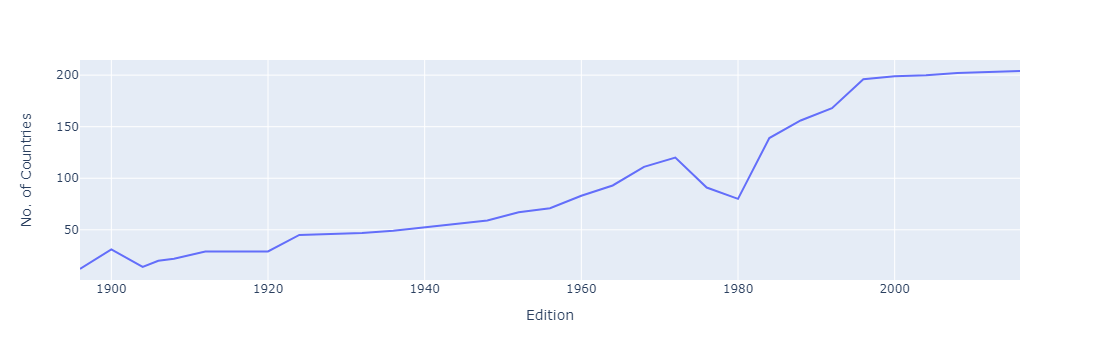

In [287]:
fig = px.line(nations_over_time,x='Edition',y='No. of Countries')
fig.show()

The overall trend in the graph shows a consistent increase in the number of participating nations over the years. However, a notable dip is observed in 1980. Upon further investigation, I found that the significant drop in participation during that year was due to the Moscow Olympics. Many nations, particularly the USA and others, boycotted the event in protest against the Soviet Union's invasion of Afghanistan. This historical context explains the lower participation in 1980, highlighting the impact of geopolitical events on the Olympic Games.

### How many events have taken place over the years in all Olympics ?

In [288]:
events_over_time = df.drop_duplicates(['Year','Event'])['Year'].value_counts().reset_index().sort_values('Year')
events_over_time.rename(columns={'Year':'Edition','count':'No. of Events'},inplace=True)

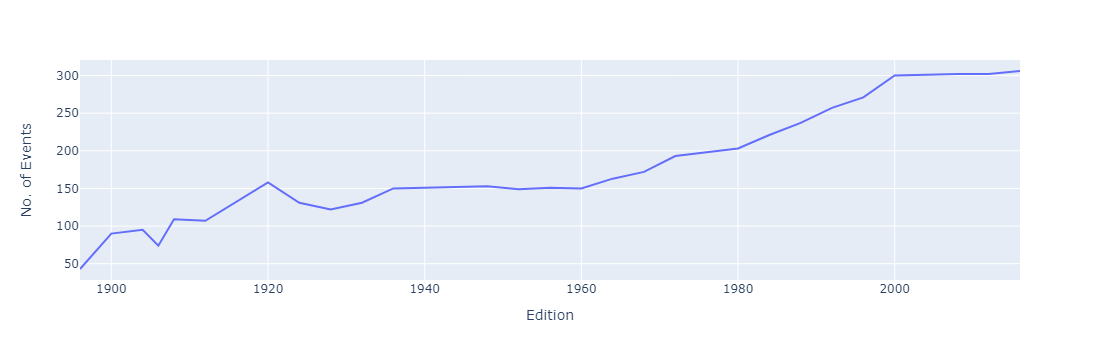

In [289]:
fig = px.line(events_over_time,x='Edition',y='No. of Events')
fig.show()

In the early years, particularly 1896 and 1900, the number of events was relatively lower ,
A significant increase is observed in the early 20th century, with peaks in 1920, 1924, and 1932

The interruptions during World War I (1916) and World War II (1940 and 1944) are evident in the reduced number of events during those periods.

Post-World War II, there is a steady rise in the number of events, reaching a peak in 2008, 2012, and 2016.

### How many Olympic events were recorded for each country in your analysis ?

In [290]:
import pandas as pd

# Assuming your dataset is loaded into a variable called 'df'
# Filter the data for Summer Olympics
summer_data = df[df['Season'] == 'Summer']

# Group by country and count the number of events
events_per_country = summer_data.groupby('NOC')['Event'].nunique()

# Sort the values in descending order to get the top countries
top_countries = events_per_country.sort_values(ascending=False).head(10)

print(top_countries)


NOC
USA    522
FRA    519
GBR    504
GER    446
ITA    429
SWE    425
CAN    408
HUN    384
GRE    377
AUS    377
Name: Event, dtype: int64


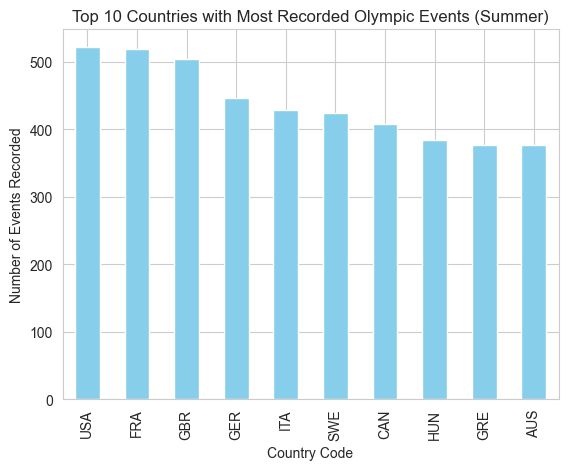

In [291]:
import matplotlib.pyplot as plt

# Plotting the bar graph
sns.set_style("whitegrid")
top_countries.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries with Most Recorded Olympic Events (Summer)')
plt.xlabel('Country Code')
plt.ylabel('Number of Events Recorded')
plt.show()


In examining the recorded Olympic events during the Summer Games from 1896 to 2016, we observe a clear hierarchy in terms of participation. The National Olympic Committee (NOC) codes reveal that the United States (USA) takes the lead with an impressive count of 522 recorded events, followed closely by France (FRA) with 519 and Great Britain (GBR) with 504. This top-tier of active participation showcases a consistent engagement of these countries in a wide array of Olympic events. The bar graph visually reinforces this observation.

### How many athlete have participated over the years in olympics ?

In [292]:
athlete_over_time = df.drop_duplicates(['Year','Name'])['Year'].value_counts().reset_index().sort_values('Year')
athlete_over_time.rename(columns={'Year':'Edition','count':'No. of Athlete'},inplace=True)

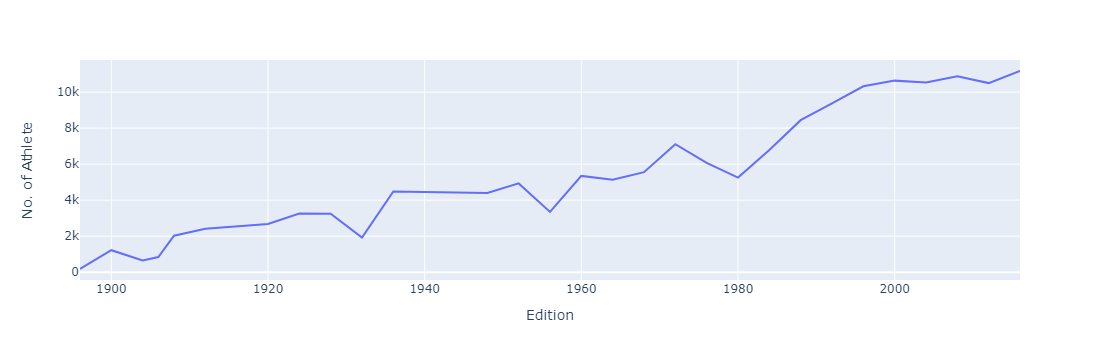

In [293]:
fig = px.line(athlete_over_time,x='Edition',y='No. of Athlete')
fig.show()

In the early years, such as 1896 and 1900, there was a relatively modest number of athletes.

A significant increase is observed in the early 20th century, reaching a peak in 1936. However, the impact of World War II is evident in the reduced number of athletes during the 1948 Olympics.

Post-World War II, there is a notable upward trend, showcasing a consistent rise in athlete participation. Peaks in 1988, 1992, and 2016 highlight the growing global interest 


### How many events were held in each sport in the Olympics?

In [294]:
x = df.drop_duplicates(['Year','Sport','Event'])

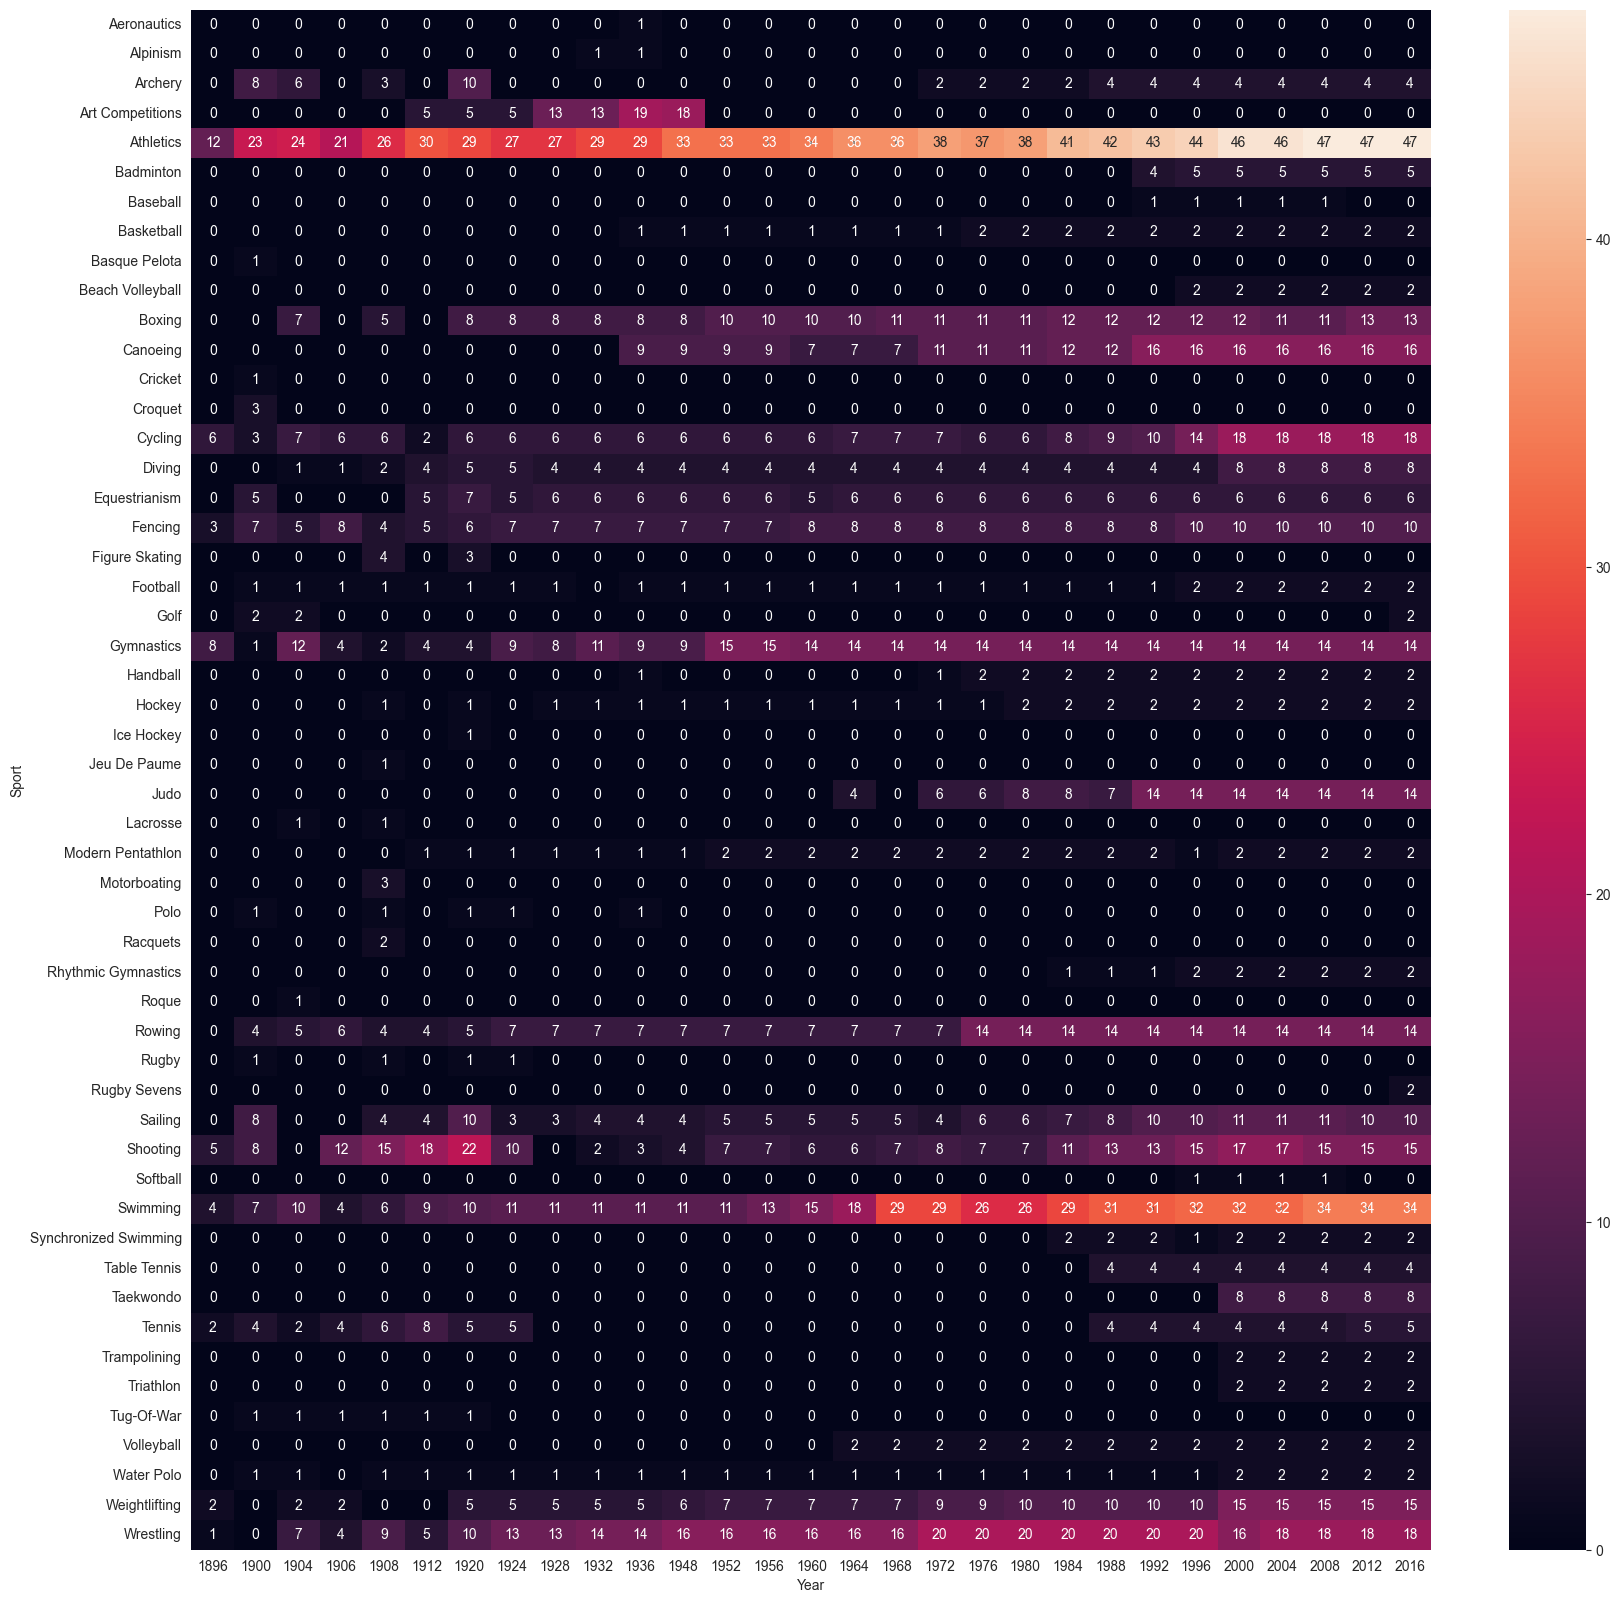

In [295]:
plt.figure(figsize=(20, 20))
y = x.pivot_table(index='Sport', columns='Year', values='Event', aggfunc='count').fillna(0).astype(int)
sns.heatmap(
    heatmap_data,
    annot=True,
)

# Manually add annotations
for i in range(len(heatmap_data)):
    for j in range(len(heatmap_data.columns)):
        plt.text(j + 0.5, i + 0.5, str(heatmap_data.iloc[i, j]),
                 ha='center', va='center', fontsize=2)

plt.show()


### Who are the most successful athletes in Olympic history ?

In [296]:
def most_successful(df, sport):
    temp_df = df.dropna(subset=['Medal'])

    if sport != 'Overall':
        temp_df = temp_df[temp_df['Sport'] == sport]

    top_names = temp_df['Name'].value_counts().reset_index().head(15)

    # Merge the top_names DataFrame with the original 'df' based on 'Name' column
    merged_df = pd.merge(top_names, df, on='Name', how='left')

    # Select specific columns after merging and drop duplicates based on 'Name'
    merged_df = merged_df[['Name', 'count', 'Sport', 'region']].drop_duplicates('Name')
    merged_df.rename(columns={'count': 'Medal'}, inplace=True)
    return merged_df

In [297]:
most_successful(df,'Swimming')

,Name,Medal,Sport,region
0,"Michael Fred Phelps, II",28,Swimming,USA
30,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",12,Swimming,USA
47,"Dara Grace Torres (-Hoffman, -Minas)",12,Swimming,USA
60,Ryan Steven Lochte,12,Swimming,USA
74,Natalie Anne Coughlin (-Hall),12,Swimming,USA
86,"Matthew Nicholas ""Matt"" Biondi",11,Swimming,USA
98,Mark Andrew Spitz,11,Swimming,USA
110,"Gary Wayne Hall, Jr.",10,Swimming,USA
120,Franziska van Almsick,10,Swimming,Germany
143,Shirley Frances Babashoff,9,Swimming,USA


Here the table includes some of the most successful athletes in the history of the Olympics, based on their impressive medal counts. Michael Phelps, the legendary swimmer from the USA, holds the record for the highest number of Olympic gold medals. Other athletes, such as Larysa Latynina, Nikolay Andrianov, and Borys Shakhlin from gymnastics, have also achieved remarkable success.

In the Web Site we can explore more details about the success of athletes in specific sports by selecting a particular sport from the dropdown menue.

### Now i will do analysis as country wise where i will focus on some features like :

* Countrywise medal tally per year(line plot)
* What countries are good at heatmap
* Most succesful athletes(Top 10)

### How many medals did each country win in each Olympic edition ?

In [298]:
temp_df = df.dropna(subset=['Medal'])
temp_df.drop_duplicates(subset=['Team','NOC','Games','Year','Season','City','Sport','Event','Medal'],inplace=True)

In [299]:
new_df = temp_df[temp_df['region']=='India']
final_df=new_df.groupby('Year').count()['Medal'].reset_index()

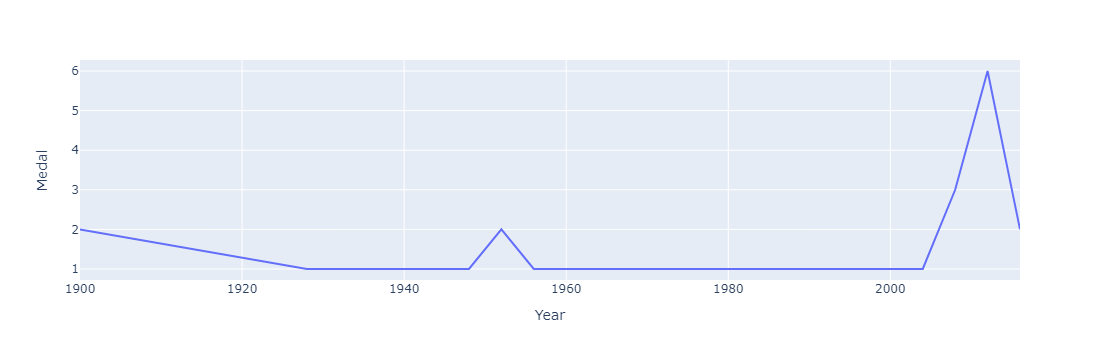

In [300]:
fig = px.line(final_df,x='Year',y='Medal')
fig.show()

This graph will help us to analyze the total number of medals a country has won in each Olympic edition gives us a clear picture of its overall performance over the years. This helps us understand the trends, successes, and changes in a country's medal achievements across various Olympic Games

### What are the countries good at heatmap ?

<Axes: xlabel='Year', ylabel='Sport'>

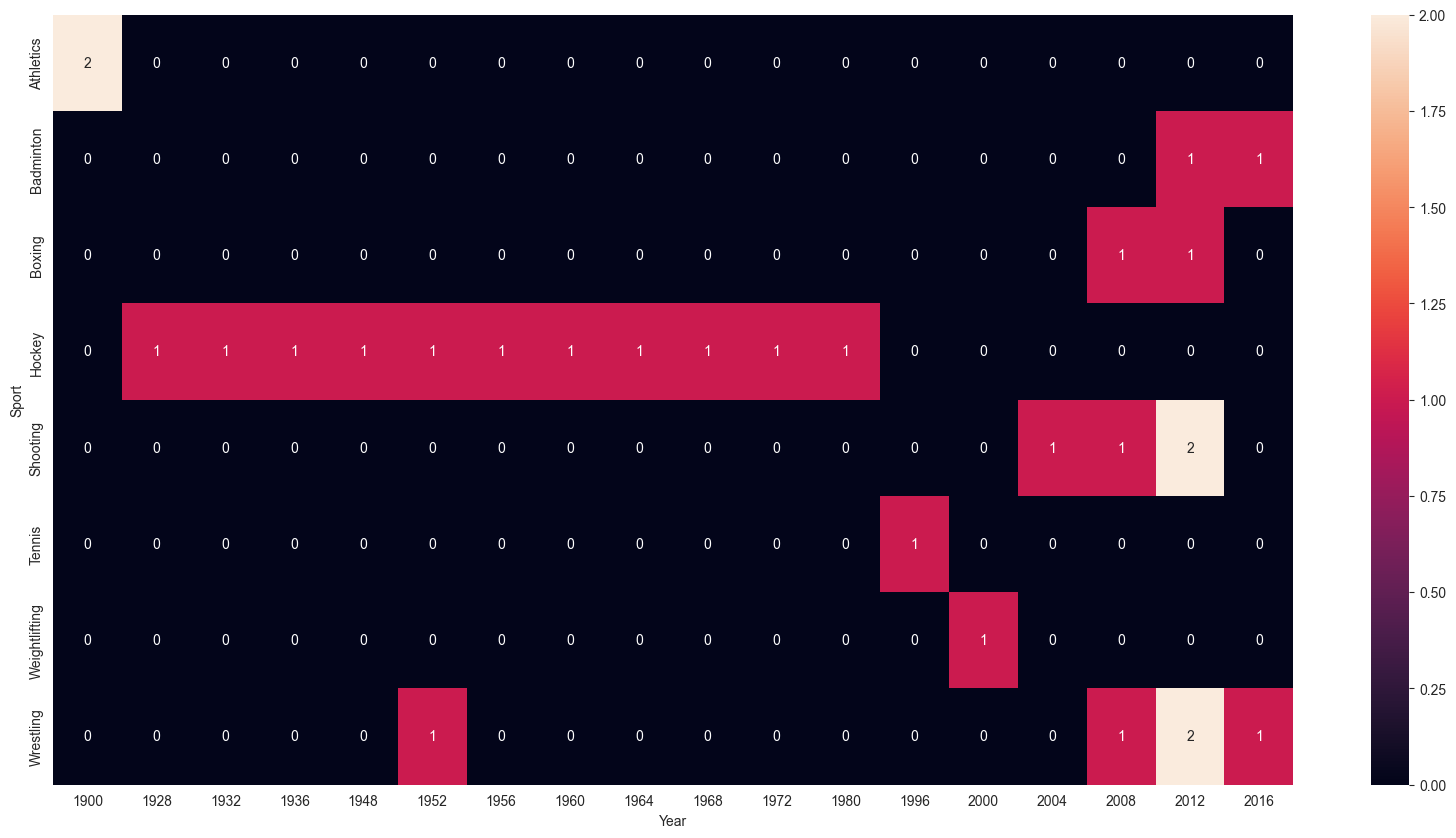

In [301]:
new_df = temp_df[temp_df['region']=='India']
plt.figure(figsize=(20,10))
sns.heatmap(new_df.pivot_table(index='Sport', columns='Year', values='Event', aggfunc='count').fillna(0),annot=True)

### What are top 10 most successful athletes ?

In [302]:
def most_successful(df, country):
    temp_df = df.dropna(subset=['Medal'])

    temp_df = temp_df[temp_df['region'] == country]

    top_names = temp_df['Name'].value_counts().reset_index().head(10)

    # Merge the top_names DataFrame with the original 'df' based on 'Name' column
    merged_df = pd.merge(top_names, df, on='Name', how='left')

    # Select specific columns after merging and drop duplicates based on 'Name'
    merged_df = merged_df[['Name', 'count', 'Sport', 'region']].drop_duplicates('Name')
    merged_df.rename(columns={'count': 'Medal'}, inplace=True)

    return merged_df

In [303]:
most_successful(df,'India')

,Name,Medal,Sport,region
0,Udham Singh Kular,4,Hockey,India
4,Leslie Walter Claudius,4,Hockey,India
8,Shankar Pillay Laxman,3,Hockey,India
11,Ranganathan Francis,3,Hockey,India
14,Richard James Allen,3,Hockey,India
17,Balbir Singh,3,Hockey,India
20,Harbinder Singh Chimni,3,Hockey,India
23,"Balbir Singh Dosanjh, Sr.",3,Hockey,India
26,"Victor John ""V. J."" Peter",3,Hockey,India
29,Dhyan Chand Bais,3,Hockey,India


This table provides valuable insights into the top-performing athletes from India in various Olympic sports. By selecting different countries from the dropdown menu, we can explore the most successful athletes and their respective medal achievements.

### Now i will do analysis as Athlete wise :

### How is the distribution of athlete ages portrayed in the distribution plot ?

In [304]:
athlete_df = df.drop_duplicates(subset = ['Name','region'])

In [305]:
x1 = athlete_df['Age'].dropna()
x2 = athlete_df[athlete_df['Medal'] == 'Gold']['Age'].dropna()
x3 = athlete_df[athlete_df['Medal'] == 'Silver']['Age'].dropna()
x4 = athlete_df[athlete_df['Medal'] == 'Bronze']['Age'].dropna()


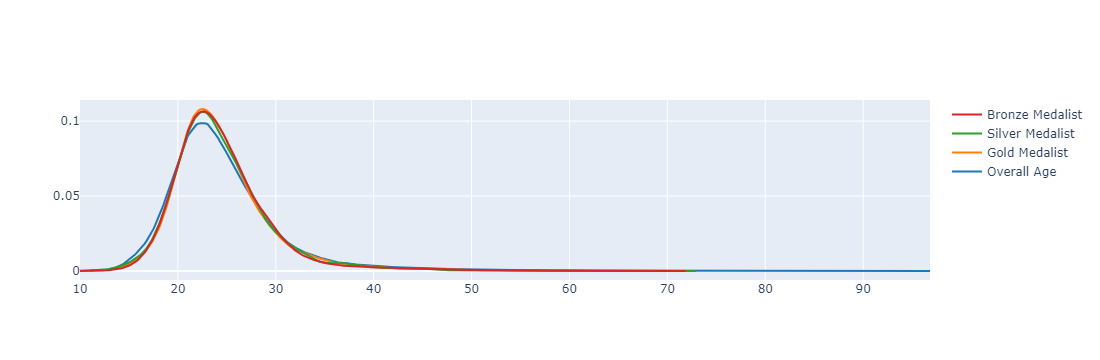

In [306]:
fig = ff.create_distplot([x1,x2,x3,x4],['Overall Age','Gold Medalist','Silver Medalist','Bronze Medalist'],show_hist=False,show_rug=False)
fig.show()

So in this plot it shows insights into the age distribution of athletes who have won silver medals. It also indicates the probability of winning gold, silver, or bronze medals at different age ranges. Notably, the peak probability for winning gold medals is observed between the ages of 20 to 30, suggesting that athletes within this age group have a higher likelihood of achieving gold medal success.

### What is the age distribution pattern for athletes in different sports, and are there specific age ranges where athletes have a higher probability of winning medals ?

In [307]:
df['Sport'].unique()

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

In [308]:
famous_sports = ['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Polo',
       'Ice Hockey']

In [309]:
# This code is only for gold medalist.
x=[]
name=[]
for sport in famous_sports:
    temp_df = athlete_df[athlete_df['Sport']==sport]
    x.append(temp_df[temp_df['Medal']=='Gold']['Age'].dropna())
    name.append(sport)

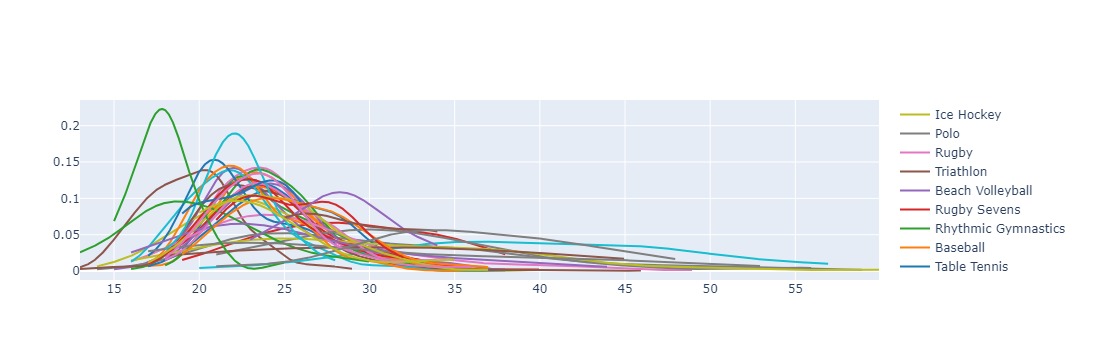

<Figure size 2000x2000 with 0 Axes>

In [310]:
plt.figure(figsize=(20,20))
fig = ff.create_distplot(x,name,show_hist=False,show_rug=False)
fig.show()

In the above graph ,it is showing that in some sports, there are specific age limits for athletes to compete, affecting their chances of winning gold. On the other hand, certain sports maintain a balanced playing field without imposing age restrictions, allowing athletes of various ages to compete for the gold.

### How does the distribution of height versus weight vary for athletes in a particular sport ?

In [311]:
athlete_df['Medal'].fillna('No Medal',inplace=True)

<Axes: xlabel='Weight', ylabel='Height'>

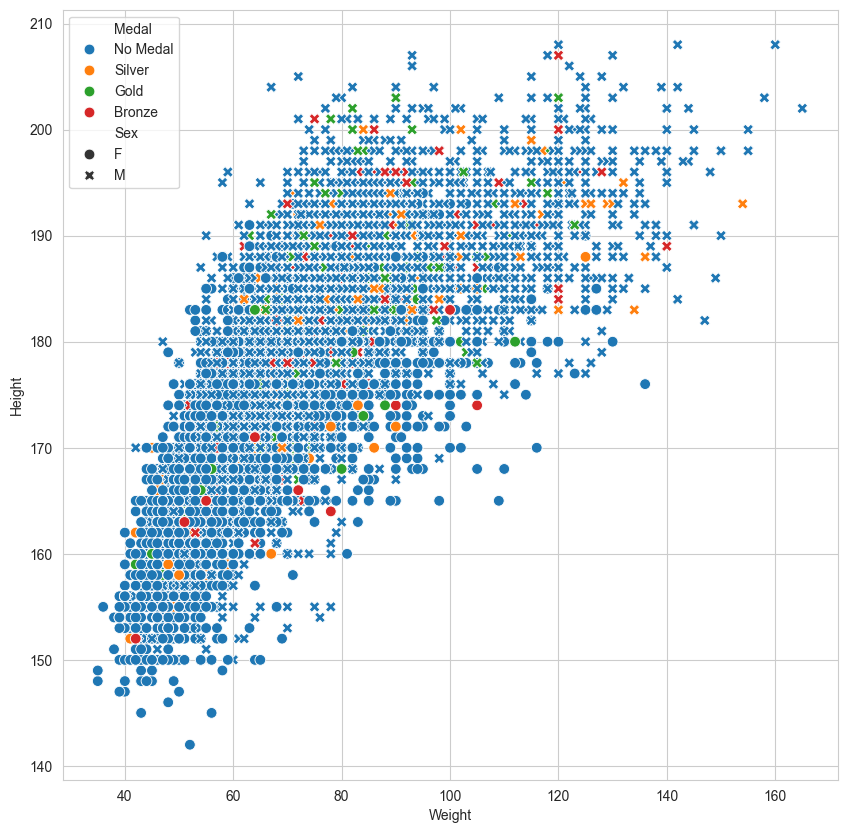

In [312]:
plt.figure(figsize=(10,10))
temp_df = athlete_df[athlete_df['Sport'] == 'Athletics']
sns.scatterplot(x=temp_df['Weight'], y=temp_df['Height'], hue=temp_df['Medal'], style=temp_df['Sex'], s=60)

This plot provides a visual representation of the distribution of athletes based on their height and weight in a particular sport. The symbols distinguish between male (cross) and female (dot) athletes, and the different colors represent the medal categories (no medal, silver, gold, bronze). The plot offers insights into how an athlete's height and weight might be associated with their chances of achieving medals in that specific sport.

### How has the participation of men and women evolved over the years in the Olympics ?

In [313]:
def men_vs_women(df):
    athlete_df = df.drop_duplicates(subset=['Name','region'])
    men = athlete_df[athlete_df['Sex'] == 'M'].groupby('Year').count()['Name'].reset_index()
    women = athlete_df[athlete_df['Sex'] == 'F'].groupby('Year').count()['Name'].reset_index()

    final = men.merge(women, on='Year', how='left')
    final.rename(columns={'Name_x': 'Male', 'Name_y': 'Female'}, inplace=True)

    final.fillna(0, inplace=True)

    return final

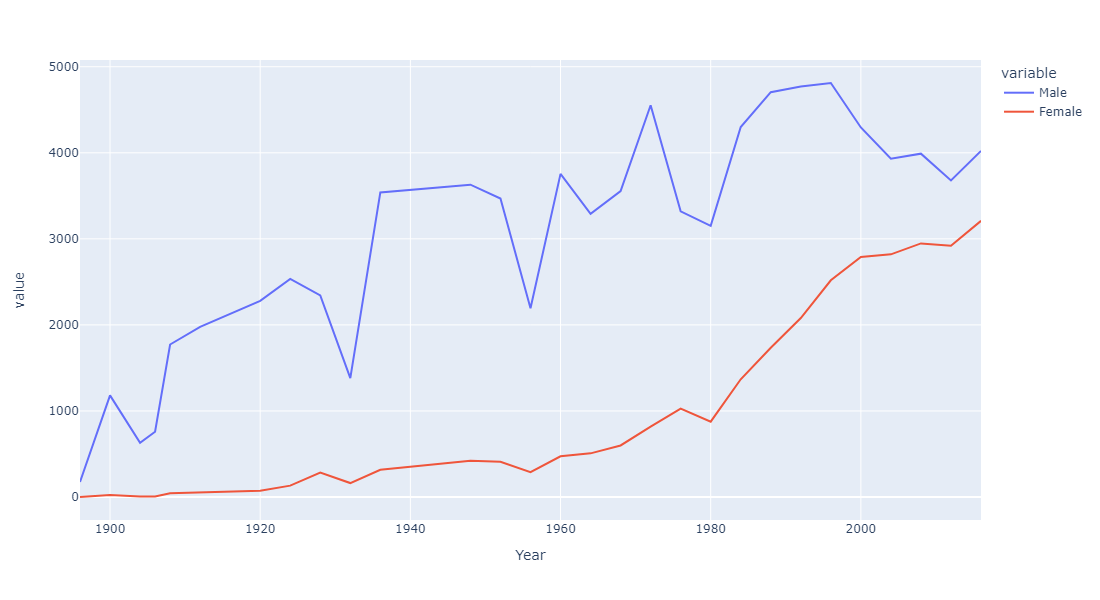

In [314]:
final = men_vs_women(df)
fig = px.line(final,x='Year',y=['Male','Female'])
fig.update_layout(autosize=False, width=1000, height=600)

In [315]:
men_vs_women(df)

,Year,Male,Female
0,1896,174,0.0
1,1900,1181,23.0
2,1904,629,6.0
3,1906,759,6.0
4,1908,1772,44.0
5,1912,1978,53.0
6,1920,2280,73.0
7,1924,2535,132.0
8,1928,2342,285.0
9,1932,1382,162.0


The table reveals the evolving participation of men and women in the Olympics over the years. While male participation has consistently been higher, there is a noticeable increase in female participation. The numbers illustrate a growing trend towards gender inclusivity, with more women actively participating in the Olympics over recent editions.

## Conclusion

In brief, our exploration of Olympic data took us through the exciting history of the Games. From the first Olympics in 1896 to the latest in 2016, we discovered intresting fact about different sports, countries, and athletes, admired outstanding athletes, and saw how sports have evolved globally. We also uncovered cool facts like more women joining the Games. In the data numbers tell a story of dedication, competition, and global unity. As we wrap up, it's clear that the Olympics are not just about medals; they're a celebration of people coming together to showcase their best. It's been an exciting ride into the heart of the Olympic spirit . So, in the end, our journey showed us the amazing stories, victories, and changes that make the Olympics special for everyone involved!

### Thank You!